In [355]:
## This notebook should take a csv file from the /build folder and plot what the energy deposited in Ge is

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [447]:
def plotdata(data_file,label):

    names = ['Edep']

    data = pd.read_csv(data_file,names=names,header=4)

    counts,energy = np.histogram(data,bins=100)

    counts=np.append(counts,0)

    total_emit = sum(counts)

    #print(total_emit)

    #plt.clf()
    plt.scatter(energy,counts/total_emit,label=label)
    #plt.scatter(energy,counts,label=label)

    
    plt.xlabel('Energy Deposited by Gamma (MeV)',fontsize=14)
    plt.ylabel('Number of Gammas',fontsize=14)
    
    plt.title(label,fontsize=14)

    #plt.xlim(0,1)
    #plt.ylim(0,0.1)


    #plt.show()

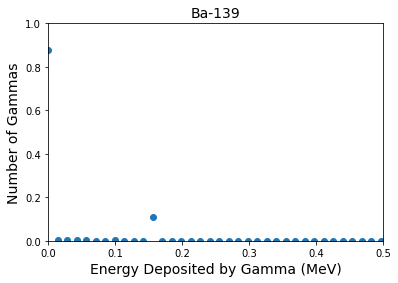

In [457]:
###############
# plotting a ba-139 source
###############


file = 'test-hist_nt_MyNtuple.csv'

plt.clf()
plotdata(file,'Ba-139')
plt.xlim(0,0.5)
plt.ylim(0,1)
plt.show()

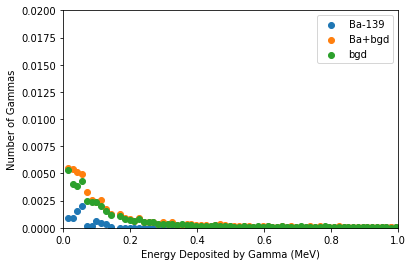

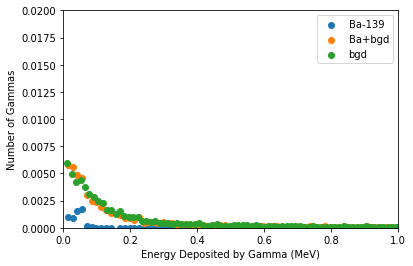

In [417]:
file = 'multiple-Ba_nt_MyNtuple.csv'

background_only = 'multiple-bgd_nt_MyNtuple.csv'

together = 'multiple-both_nt_MyNtuple.csv'


plt.clf()
plotdata(file,'Ba-139')
plotdata(together, 'Ba+bgd')
#plotdata(together2, 'Ba+bgd2')

plotdata(background_only, 'bgd')
plt.legend()
plt.ylim(0,0.02)
plt.show()


file_no = 'nofilter-multiple-Ba_nt_MyNtuple.csv'

background_only_no = 'nofilter-multiple-back_nt_MyNtuple.csv'

together_no = 'nofilter-multiple-both_nt_MyNtuple.csv'


plt.clf()
plotdata(file_no,'Ba-139')
plotdata(together_no, 'Ba+bgd')
#plotdata(together2, 'Ba+bgd2')

plotdata(background_only_no, 'bgd')
plt.legend()
plt.ylim(0,0.02)
plt.show()


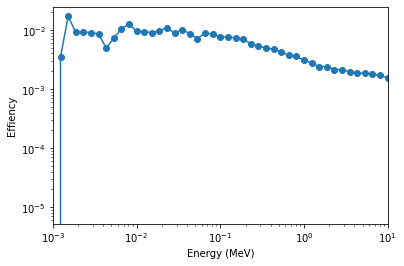

In [310]:
####################
# Logarithmic Histogram
####################

file = 'test-sweeo_nt_MyNtuple.csv'

names = ['Edep']

data = pd.read_csv(file,names=names,header=4)


# log-scaled bins
bins = np.logspace(-5, 4, 100)



widths = (bins[1:] - bins[:-1])

# Calculate histogram
counts, energy = np.histogram(data, bins=bins)

# normalize by bin width
hist_norm = counts/widths


total_emit = sum(counts)

hist_norm=np.append(hist_norm,0)

# plot it!
plt.plot(energy,hist_norm/1e6)
plt.scatter(energy,hist_norm/1e6)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Energy (MeV)')
plt.ylabel('Effiency')

#plt.ylim(10e-5,10e-2)
plt.xlim(1e-3,10)

plt.savefig('sweep-efficiency.jpg')
